In [9]:
#Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from wordcloud import WordCloud
from random import randint

#Uncomment if not available and download it.
#nltk.download('stopwords')
#nltk.download('punkt')

#Load the dataset
df = pd.read_csv("../Data/Combined_News_DJIA.csv", encoding = 'ISO-8859-1')

#Print first 5 rows
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

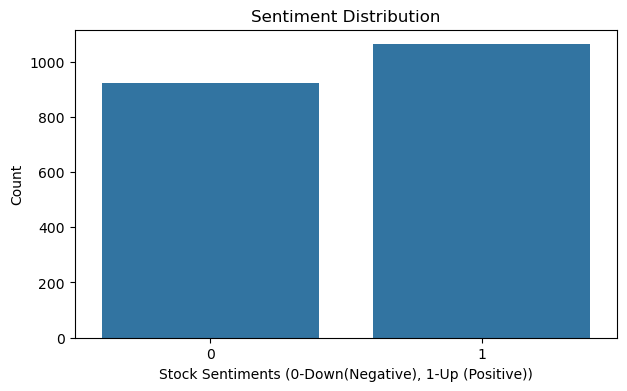

In [15]:
#Cleaning

#Drop NaN 
df.dropna(inplace=True)

#Visualize label distribution
plt.figure(figsize=(7, 4))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down(Negative), 1-Up (Positive))')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [16]:
#Clean and Preprocessing

#We will merge all the  top 25 headlines in one string per row
headlines = []
for row in range(0, len(df.index)):
    headlines.append(' '.join(str(x) for x in df.iloc[row, 2:]))

#Remove stop words and save it in corpus
ps = PorterStemmer()
corpus = []
for text in headlines:
    words = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    words = [ps.stem(word) for word in words if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(words))

In [17]:
#Train and Test split using date range
train = df[df['Date'] < '2015-01-01']
test = df[df['Date'] > '2014-12-31']

train_corpus = corpus[:len(train)]
test_corpus = corpus[len(train):]

y_train = train['Label']
y_test = test['Label']

# Feature extraction
cv = CountVectorizer(max_features=10000, ngram_range=(2, 2))
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()

--- Logistic Regression ---
Accuracy: 53.97 %
Precision: 0.54
Recall: 0.63
F1 Score: 0.58



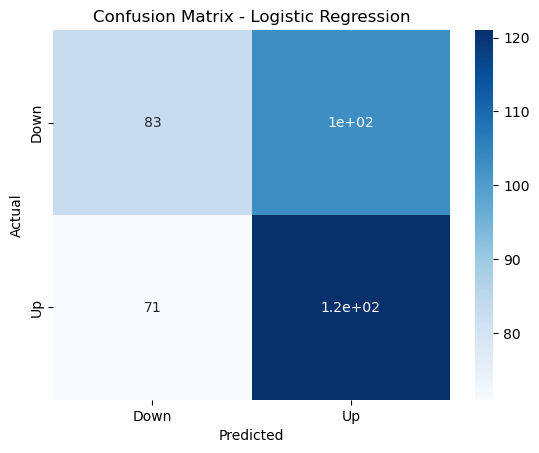

--- Random Forest ---
Accuracy: 51.59 %
Precision: 0.51
Recall: 0.83
F1 Score: 0.63



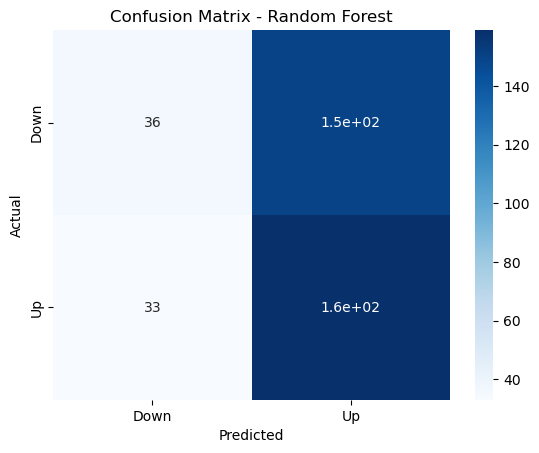

--- Naive Bayes ---
Accuracy: 46.56 %
Precision: 0.47
Recall: 0.45
F1 Score: 0.46



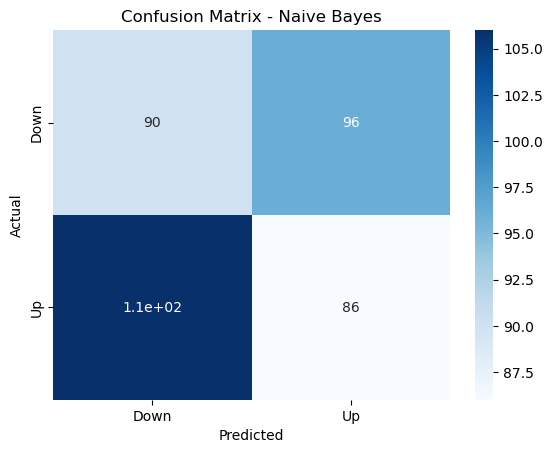

--- MLP Classifier ---
Accuracy: 52.91 %
Precision: 0.53
Recall: 0.63
F1 Score: 0.58



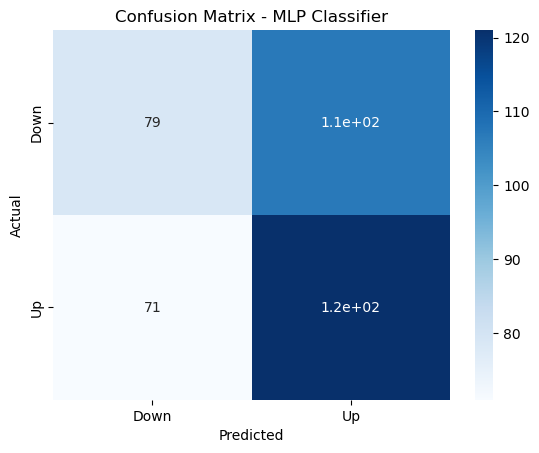

In [23]:
# Model training and evaluation
from sklearn.metrics import f1_score
#Define a common function to evaluate all the models
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"--- {name} ---")
    print(f"Accuracy: {round(acc * 100, 2)} %")
    print(f"Precision: {round(prec, 2)}")
    print(f"Recall: {round(rec, 2)}")
    print(f"F1 Score: {round(f1, 2)}\n")
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Run models
evaluate_model(LogisticRegression(), "Logistic Regression")
evaluate_model(RandomForestClassifier(n_estimators=100, criterion='entropy'), "Random Forest")
evaluate_model(GaussianNB(), "Naive Bayes")
evaluate_model(MLPClassifier(hidden_layer_sizes=(100,), max_iter=300), "MLP Classifier")

In [20]:
# Predict a random test sample
sample_test = df[df['Date'] > '2014-12-31'].reset_index()
sample_news = sample_test.iloc[randint(0, sample_test.shape[0] - 1), 2:]
sample_text = ' '.join(str(x) for x in sample_news)
sample_text = re.sub('[^a-zA-Z]', ' ', sample_text).lower()
words = [ps.stem(w) for w in sample_text.split() if w not in set(stopwords.words('english'))]
final_text = ' '.join(words)

print(final_text)

australian learner driver stitch chainsaw wound drank gin pain drive hospit lost suprem court appeal drink drive charg ukrain truce broken time first day magnitud earthquak record northern japan tsunami warn issu chilean approv legisl decrimin abort mexican marijuana product slump face us legal japan conserv prime minist shinzo abe said tuesday govern would uphold tokyo offici apolog damag suffer inflict neighbor world war ii major war like ukrain say prime minist slovakia cia bought destroy iraqi chemic weapon cia purchas nerv agent rocket seller part undisclos effort ensur remain chemic weapon fall terrorist hand arm purchas plan known oper avaric began continu islam state milit burn death iraq robert mugab birthday parti cook elephantin storm start donat meat eleph buffalo sabl impala lion zimbabwean presid st anger conservationist palestinian rap band threaten take legal action prime minist benjamin netanyahu right wing likud parti releas campaign ad song associ isi jodran mosqu ru

In [22]:
#Predict
temp_vec = cv.transform([final_text]).toarray()
pred = LogisticRegression().fit(X_train, y_train).predict(temp_vec)[0]
print("Prediction:", "Stock Up" if pred else "Stock Down")

Prediction: Stock Up
